In [1]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper

In [2]:
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=watch,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment

# # fix for error generated by the gym wrapper on line 241, python3.10/site-packages/mlagents_envs/rpc_utils.py in _observation_to_np_array
# # use img = img.reshape(obs.shape)

I0000 00:00:1745092278.329743 12135931 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [3]:
print(env.action_space)
# 0 - nothing
# 1 - rotate right by 6 degrees
# 2 - rotate left by 6 degrees
# 3 - accelerate forward
# 4 - accelerate forward and rotate CW by 6 degrees
# 5 - accelerate forward and rotate CCW by 6 degrees
# 6 - accelerate backward
# 7 - accelerate backward and rotate CW by 6 degrees
# 8 - accelerate backward and rotate CCW by 6 degrees


print(env.observation_space) # see python3.10/site-packages/animalai/environment.py, line 202
# Box(84, 84, 3) - rgb image
# Box(-inf, inf, (7,)) - (health; v1, v2, v3; p1, p2, p3)

Discrete(9)
Tuple(Box(0.0, 1.0, (3, 84, 84), float32), Box(-inf, inf, (7,), float32))


In [4]:
env.reset()

[array([[[0.3882353 , 0.49019608, 0.6431373 ],
         [0.38431373, 0.49019608, 0.6431373 ],
         [0.38431373, 0.4862745 , 0.6392157 ],
         ...,
         [0.40392157, 0.5137255 , 0.6745098 ],
         [0.40784314, 0.5176471 , 0.6784314 ],
         [0.4117647 , 0.5176471 , 0.68235296]],
 
        [[0.39215687, 0.49411765, 0.6509804 ],
         [0.3882353 , 0.49411765, 0.64705884],
         [0.3882353 , 0.49019608, 0.6431373 ],
         ...,
         [0.40784314, 0.5176471 , 0.6784314 ],
         [0.4117647 , 0.5176471 , 0.68235296],
         [0.4117647 , 0.52156866, 0.68235296]],
 
        [[0.39607844, 0.49803922, 0.654902  ],
         [0.39215687, 0.49803922, 0.6509804 ],
         [0.39215687, 0.49411765, 0.6509804 ],
         ...,
         [0.4117647 , 0.5176471 , 0.68235296],
         [0.4117647 , 0.52156866, 0.68235296],
         [0.41568628, 0.52156866, 0.6862745 ]],
 
        ...,
 
        [[0.49803922, 0.47058824, 0.36078432],
         [0.43137255, 0.39607844, 0.29019

In [5]:
# for i in range(60):
#     obs, reward, done, info = env.step(1)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4]) # (v?, v?, v forward/backard relative to starting orientation)
#     print("pos:", obs[1][4:7]) # (p?, p?, p forward/backard relative to starting orientation)

# for i in range(30):
#     obs, reward, done, info = env.step(4)
#     obs, reward, done, info = env.step(7)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4])
#     print("pos:", obs[1][4:7])

obs, reward, done, info = env.step(3)
print("obs[0] shape", obs[0].shape)
print("obs[0][0] ", obs[0][0])
print("health:", obs[1][1])
print("vel:", obs[1][1:4])
print("pos:", obs[1][4:7])

obs[0] shape (84, 84, 3)
obs[0][0]  [[0.3882353  0.49019608 0.6431373 ]
 [0.38431373 0.49019608 0.6431373 ]
 [0.38431373 0.4862745  0.6392157 ]
 [0.38039216 0.48235294 0.63529414]
 [0.38039216 0.48235294 0.63529414]
 [0.3764706  0.47843137 0.6313726 ]
 [0.3764706  0.4745098  0.627451  ]
 [0.37254903 0.47058824 0.627451  ]
 [0.36862746 0.47058824 0.62352943]
 [0.36862746 0.47058824 0.62352943]
 [0.36862746 0.47058824 0.62352943]
 [0.36862746 0.46666667 0.61960787]
 [0.36862746 0.46666667 0.61960787]
 [0.3647059  0.46666667 0.61960787]
 [0.3647059  0.46666667 0.61960787]
 [0.3647059  0.4627451  0.6156863 ]
 [0.3647059  0.4627451  0.6156863 ]
 [0.3647059  0.4627451  0.6156863 ]
 [0.36078432 0.4627451  0.6156863 ]
 [0.36078432 0.45882353 0.6117647 ]
 [0.36078432 0.45882353 0.6117647 ]
 [0.36078432 0.45882353 0.6117647 ]
 [0.35686275 0.45882353 0.6117647 ]
 [0.35686275 0.45490196 0.60784316]
 [0.35686275 0.45490196 0.60784316]
 [0.35686275 0.45490196 0.60784316]
 [0.35686275 0.45490196 0.60

In [6]:
env.close()

In [1]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper
from animalai_agent import AnimalAIVectorhashAgent
from vectorhash import build_vectorhash_architecture
from smoothing import PolynomialSmoothing
import random

### vhash
shapes = [(3,3,4), (4,4,5)]
model = build_vectorhash_architecture(shapes, N_h=1200, input_size=84*84, initalization_method="by_sparsity", limits=(40,40,360))




### animalai
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=False,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=0.1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment





#### agent
agent = AnimalAIVectorhashAgent(model, env)
agent.vectorhash.certainty = 0.75

by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  1200


I0000 00:00:1745196698.379907 4290128 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/hippocampal_sensory_layers.py:104: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  1 + input.T @ self.inhibition_matrix_hs @ input


info for each h directly after learning it
h max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
h_from_s max, min, mean tensor(7.0266) tensor(-2.8488) tensor(1.6835)
h_from_s_denoised max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1081)
mse/cosinesimilarity h from book and h from s tensor(4.3536e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(8.3158e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(8.2696e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h tensor(8.2696e-07) tensor([1.0000])


/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:81: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:88: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:104: UserWarning: Using a target size (torch.Size([1, 7056])) that is different to the input size (torch.Size([7056])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sa

In [2]:
from test_utils import generate_animalai_path

# path = generate_animalai_path(100)

actions = []
actions_temp = [3, 3,3,3, 1, 3, 3,3,3 ,2, 3, 3,3,3 ,2, 3, 3,3,3, 3, 3, 1, 3,3,3, 3, 2, 3,3,3, 3, 1, 3, 3,3,3,1,3,3,3,3,1,3,3,3,3,2,3,3,3,3,1,3,3,3,3,2,3,3,3,3,1,3,3,3,3,3,3,3,3,1,3,3,3,3,1,3,3,3,3]
for i in actions_temp:
    if i == 1 or i == 2:
        for o in range(15):
            actions.append(i)
            for t in range(2):
                actions.append(0)
    else:
        actions.append(i)
        for t in range(1):
            actions.append(0)


In [3]:
agent.test_path(actions)

info for each h directly after learning it
h max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
h_from_s max, min, mean tensor(7.0277) tensor(-2.8493) tensor(1.6838)
h_from_s_denoised max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1081)
mse/cosinesimilarity h from book and h from s tensor(1.0865e-07) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(2.0814e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(2.0698e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h tensor(2.0698e-07) tensor([1.0000])
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0., 0.]), tensor([1., 0., 0., 0., 0.])]
ol

/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash_functions.py:495: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(w).to(device).clip(1e-8)


info for each h directly after learning it
h max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
h_from_s max, min, mean tensor(7.0280) tensor(-2.8494) tensor(1.6838)
h_from_s_denoised max, min, mean tensor(7.0288) tensor(-2.8497) tensor(1.6840)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1081)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1081)
mse/cosinesimilarity h from book and h from s tensor(5.7117e-08) tensor([1.])
mse/cosinesimilarity h from book and h from s denoised tensor(0.) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(7.3165e-05) tensor([0.9999])
mse/cosinesimilarity s and s from h from s denoised tensor(7.3164e-05) tensor([0.9999])
mse/cosinesimilarity s and s from h tensor(7.3164e-05) tensor([0.9999])
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0., 0.]), tensor([1., 0., 0., 0., 0.])]
St

([(tensor(-0.), tensor(-0.), tensor(-0.))],
 [3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
 

In [ ]:
import torch
agent.vectorhash.scaffold.shift([torch.tensor(0.5), torch.tensor(0), torch.tensor(0)])

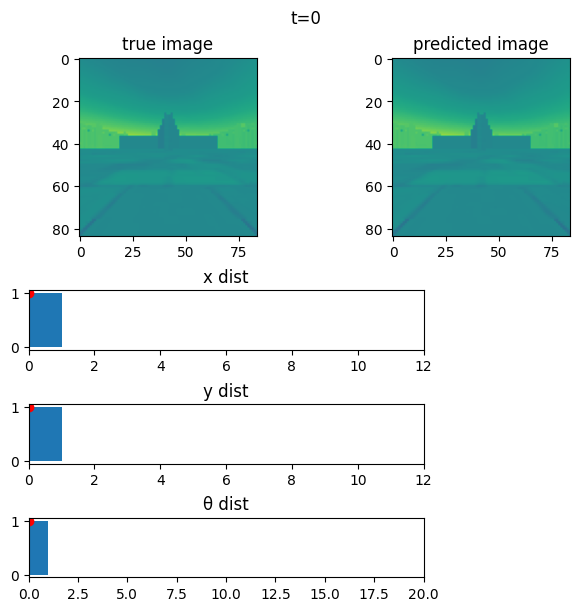

In [4]:
ani = agent.history.make_image_video()

In [5]:
ani.save("gifs/testpath2.gif", progress_callback=lambda current, total: print(f"frame {current}/{total}"), dpi=150)

MovieWriter ffmpeg unavailable; using Pillow instead.


frame 0/762
frame 1/762
frame 2/762
frame 3/762
frame 4/762
frame 5/762
frame 6/762
frame 7/762
frame 8/762
frame 9/762
frame 10/762
frame 11/762
frame 12/762
frame 13/762
frame 14/762
frame 15/762
frame 16/762
frame 17/762
frame 18/762
frame 19/762
frame 20/762
frame 21/762
frame 22/762
frame 23/762
frame 24/762
frame 25/762
frame 26/762
frame 27/762
frame 28/762
frame 29/762
frame 30/762
frame 31/762
frame 32/762
frame 33/762
frame 34/762
frame 35/762
frame 36/762
frame 37/762
frame 38/762
frame 39/762
frame 40/762
frame 41/762
frame 42/762
frame 43/762
frame 44/762
frame 45/762
frame 46/762
frame 47/762
frame 48/762
frame 49/762
frame 50/762
frame 51/762
frame 52/762
frame 53/762
frame 54/762
frame 55/762
frame 56/762
frame 57/762
frame 58/762
frame 59/762
frame 60/762
frame 61/762
frame 62/762
frame 63/762
frame 64/762
frame 65/762
frame 66/762
frame 67/762
frame 68/762
frame 69/762
frame 70/762
frame 71/762
frame 72/762
frame 73/762
frame 74/762
frame 75/762
frame 76/762
frame 77/

In [ ]:
agent.history._estimated_images

[tensor([[0.4792, 0.4783, 0.4752,  ..., 0.5016, 0.5055, 0.5066],
         [0.4834, 0.4822, 0.4792,  ..., 0.5055, 0.5066, 0.5094],
         [0.4873, 0.4862, 0.4834,  ..., 0.5066, 0.5094, 0.5105],
         ...,
         [0.4681, 0.3956, 0.3928,  ..., 0.4121, 0.3833, 0.4303],
         [0.3956, 0.3928, 0.4550,  ..., 0.4712, 0.4082, 0.3824],
         [0.3928, 0.4522, 0.4709,  ..., 0.4748, 0.4645, 0.3903]]),
 tensor([[0.4336, 0.4329, 0.4301,  ..., 0.4539, 0.4575, 0.4585],
         [0.4374, 0.4364, 0.4336,  ..., 0.4575, 0.4585, 0.4610],
         [0.4410, 0.4400, 0.4374,  ..., 0.4585, 0.4610, 0.4620],
         ...,
         [0.4111, 0.3604, 0.3679,  ..., 0.3844, 0.3533, 0.3822],
         [0.3604, 0.3679, 0.4143,  ..., 0.4269, 0.3815, 0.3509],
         [0.3679, 0.4122, 0.4262,  ..., 0.4291, 0.4219, 0.3682]]),
 tensor([[0.4348, 0.4341, 0.4313,  ..., 0.4552, 0.4587, 0.4597],
         [0.4386, 0.4376, 0.4348,  ..., 0.4587, 0.4597, 0.4623],
         [0.4422, 0.4412, 0.4386,  ..., 0.4597, 0.4623, 0.

In [ ]:
env.close()

In [51]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper
from animalai_agent import AnimalAIVectorhashAgent
from vectorhash import build_vectorhash_architecture
from smoothing import PolynomialSmoothing
import random

### vhash
shapes = [(3,3,4), (4,4,5)]
model = build_vectorhash_architecture(shapes, N_h=1200, input_size=84*84, initalization_method="by_sparsity", limits=(40,40,360))




### animalai
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=False,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment
agent = AnimalAIVectorhashAgent(model, env)


by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  1200


I0000 00:00:1745102792.652593 12271081 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:81: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:88: UserWarning: Using a target size (torch.Size([1, 1200])) that is different to the input size (torch.Size([1200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/vectorhash.py:104: UserWarning: Using a target size (torch.Size([1, 7056])) that is different to the input size (torch.Size([7056])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the sa

tensor([20.,  5.])
